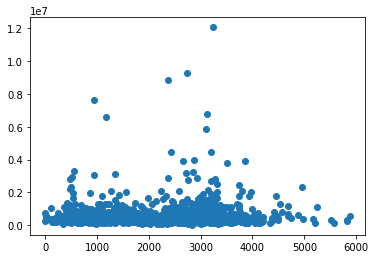

In [115]:
import pandas as pd 
from numpy.random import randn
from numpy.random import seed
from numpy import cov

from numpy import mean,std
from numpy.random import randn

from matplotlib import pyplot 

import matplotlib.pyplot as plt

data = pd.read_csv("output_final.csv") 

views_list=list(data.views)

tr_len=[]
for i,j in data.iterrows():
	tr_len.append(len(j[14].split()))

pyplot.scatter(tr_len,views_list)
pyplot.show()


In [6]:
#Before removing outliers
import scipy.stats
scipy.stats.pearsonr(views_list, tr_len)

(0.059094925242052426, 0.04093396007585016)

In [7]:
import numpy
numpy.corrcoef(views_list, tr_len)[0, 1]

0.059094925242052426

In [9]:
from scipy.stats import pearsonr

corr, p_value = pearsonr(views_list, tr_len)
print(corr)
print(p_value)

0.059094925242052426
0.04093396007585016


In [10]:
scipy.stats.spearmanr(views_list, tr_len)

SpearmanrResult(correlation=0.08029036738257152, pvalue=0.005445153310213061)

In [17]:
df = pd.DataFrame({'views':data["views"]})
df["comments"]=data["comments"]
df["transcripts"]=tr_len
df.corr()

,views,comments,transcripts
views,1.000000,0.660404,0.059095
comments,0.660404,1.000000,0.131010
transcripts,0.059095,0.131010,1.000000


In [18]:
pd.scatter_matrix(df, figsize=(6, 6))
plt.show()

AttributeError: module 'pandas' has no attribute 'scatter_matrix'

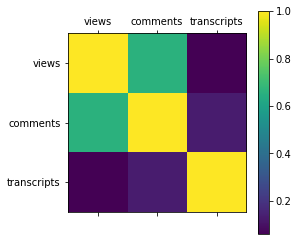

In [21]:
plt.matshow(df.corr())
plt.xticks(range(len(df.columns)), df.columns)
plt.yticks(range(len(df.columns)), df.columns)
plt.colorbar()
plt.show()

-278665.0
1144491.0
com 1097


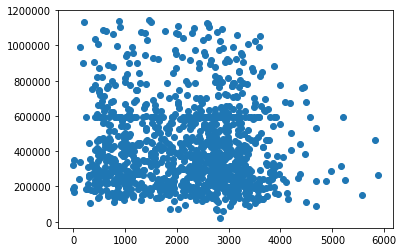

In [144]:
#REMOVAL_OF_OUTLIERS_FROM_VIEWS
import numpy as np
import math

ff=pd.read_csv("output_final.csv") 
comm=list(ff.comments)
vf=list(ff.views)
v=[]
t=[]
v=vf
v.sort()
l=len(v)
vf=list(ff.views)
#print("vf\n",vf)

#print("Before",l)

i1=math.floor(0.25*(l+1))
i3=math.floor(0.75*(l+1))

q1=v[i1]
q3=v[i3]

iqr=scipy.stats.iqr(v)

min=q1-(1.5*(iqr))
max=q3+(1.5*(iqr))

print(min)
print(max)

#q1=np.quantile(v, 0.25)
#q1=np.quantile(v, 0.75)

p=[]
count=0
#print("#############################################################\n\n")
for i in vf:
    if i<min or i>max:
        #print(i)
        count+=1
        ind=vf.index(i)
        t.append(ind)
        #p.append(i)
        #print(count,ind,i)
        #vf.remove(i)
        
        
for i in sorted(t, reverse=True):
    vf.remove(vf[i])    
    
#print(len(vf))
#print(p,len(p))
#print("vf",vf)
#print("After",len(v))
#print("#############################################################\n\n")        
tr_l=[]

for i,j in ff.iterrows():
    tr_l.append(len(j[14].split()))
#print(tr_l)


for i in sorted(t, reverse=True):
    tr_l.remove(tr_l[i])
    
for i in sorted(t, reverse=True):
    comm.remove(comm[i])
    
#print("tr_len",len(tr_l))

#print("vf",len(vf))

print("com",len(comm))
    
pyplot.scatter(tr_l,vf)
pyplot.show()





Transcripts 
  Before: 1097
min  -1249.5
max 5539.5


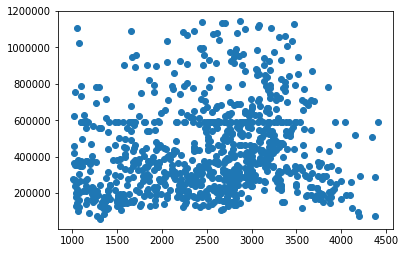

879 879 879


In [145]:
#REMOVAL_OF_OUTLIERS_FROM_TRNSCRIPTS

#com=comm
v=vf
t=tr_l
tf=tr_l
tf.sort()
l=len(tf)
print("Transcripts \n  Before:",l)

i1=math.floor(0.25*(l+1))
i3=math.floor(0.75*(l+1))

q1=tf[i1]
q3=tf[i3]

iqr=scipy.stats.iqr(tf)

min=q1-(1.5*(iqr))
max=q3+(1.5*(iqr))

print("min ",min)
print("max",max)

c=[]
for i in t:
    if i<1009 or i>4427:
        #print(i)    
        ind=t.index(i)
        c.append(ind)
        #p.append(i)
        #print(count,ind,i)
        #t.remove(i)

for i in sorted(c, reverse=True):
    t.remove(t[i])
        
for i in sorted(c, reverse=True):
    v.remove(v[i])

for i in sorted(c, reverse=True):
    comm.remove(comm[i])


pyplot.scatter(t,v)
pyplot.show()

print(len(v),len(t),len(comm))




In [127]:
scipy.stats.spearmanr(t,v)

SpearmanrResult(correlation=0.17544167166739885, pvalue=1.6522266294763927e-07)

In [128]:
corr, p_value = pearsonr(t,v)
print(corr)
print(p_value)

0.14110406502914594
2.6867209148145565e-05


In [146]:
df = pd.DataFrame({'views':v})
df["transcripts"]=t
df["comments"]=comm
df.corr()

,views,transcripts,comments
views,1.000000,0.141104,0.003077
transcripts,0.141104,1.000000,0.034198
comments,0.003077,0.034198,1.000000


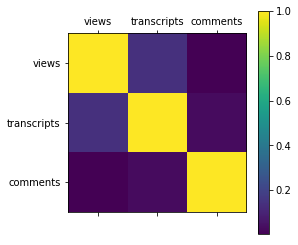

In [147]:
plt.matshow(df.corr())
plt.xticks(range(len(df.columns)), df.columns)
plt.yticks(range(len(df.columns)), df.columns)
plt.colorbar()
plt.show()